##### import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn

## Importing the Data

In [20]:
df = pd.read_csv("../input/sales-forecasting/train.csv" , sep = "," ,encoding = "utf-8")
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94


In [4]:
df['Segment'].value_counts()

Consumer       5101
Corporate      2953
Home Office    1746
Name: Segment, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

<Axes: >

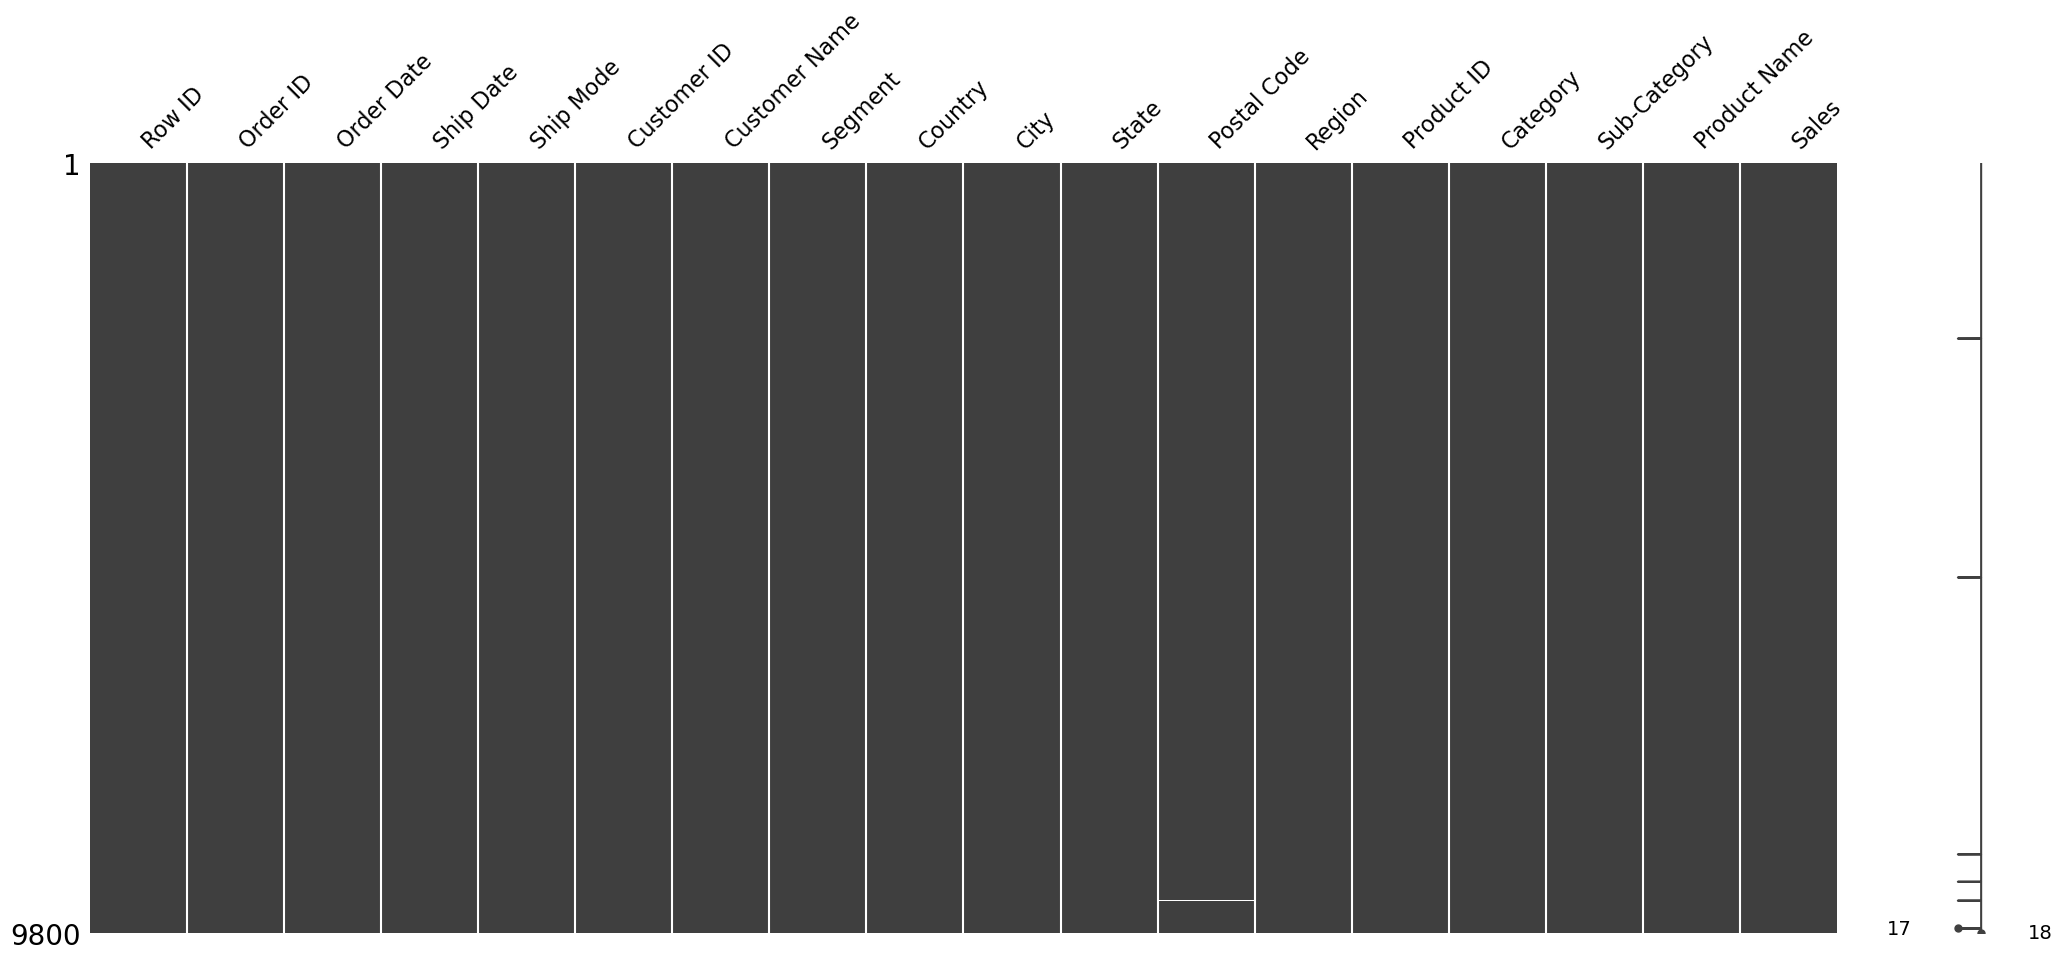

In [9]:
msn.matrix(df)  #plot missing value check

In [6]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [7]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [25]:
df.describe()['Sales']

count     9800.000000
mean       230.769059
std        626.651875
min          0.444000
25%         17.248000
50%         54.490000
75%        210.605000
max      22638.480000
Name: Sales, dtype: float64

In [11]:
df2= df.copy()

## Top selling Categories?

In [12]:
category_sales= df.groupby(['Category']).sum().sort_values("Sales" , ascending= False)[["Sales"]]
category_sales

/tmp/ipykernel_32/825837749.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  category_sales= df.groupby(['Category']).sum().sort_values("Sales" , ascending= False)[["Sales"]]


,Sales
Category,
Technology,827455.8730
Furniture,728658.5757
Office Supplies,705422.3340


In [13]:
category_sales.index

Index(['Technology', 'Furniture', 'Office Supplies'], dtype='object', name='Category')

<BarContainer object of 3 artists>

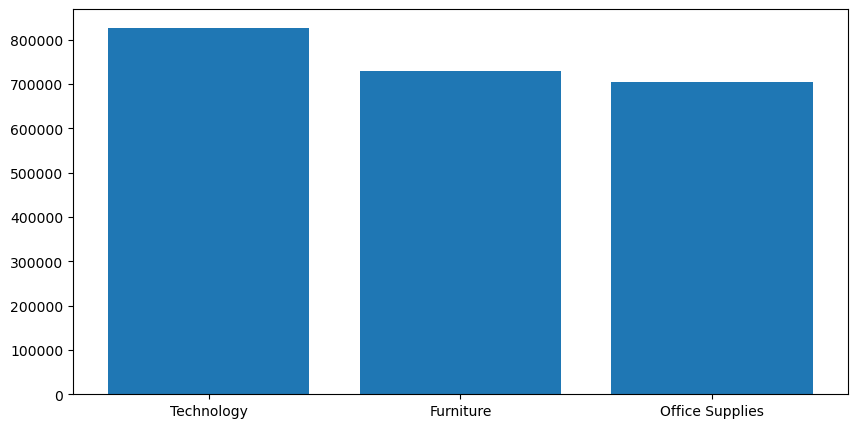

In [14]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(category_sales.index, category_sales['Sales'])

## Does Sales increase or decrease over Time?

In [15]:
df2= df.copy()
# df2['Order Date'] = pd.to_datetime(df2['Order Date'], format='%d/%m/%Y')
df2.sort_values(by='Order Date')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
4009,4010,CA-2018-144463,01/01/2018,05/01/2018,Standard Class,SC-20725,Steven Cartwright,Consumer,United States,Los Angeles,California,90036.0,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430
6682,6683,CA-2018-154466,01/01/2018,02/01/2018,First Class,DP-13390,Dennis Pardue,Home Office,United States,Franklin,Wisconsin,53132.0,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600
8069,8070,CA-2018-151750,01/01/2018,05/01/2018,Standard Class,JM-15250,Janet Martin,Consumer,United States,Huntsville,Texas,77340.0,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560
8070,8071,CA-2018-151750,01/01/2018,05/01/2018,Standard Class,JM-15250,Janet Martin,Consumer,United States,Huntsville,Texas,77340.0,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420
8071,8072,CA-2018-151750,01/01/2018,05/01/2018,Standard Class,JM-15250,Janet Martin,Consumer,United States,Huntsville,Texas,77340.0,Central,FUR-CH-10003199,Furniture,Chairs,Office Star - Contemporary Task Swivel Chair,310.744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1153,1154,CA-2017-160395,31/12/2017,06/01/2018,Standard Class,KL-16555,Kelly Lampkin,Corporate,United States,Reno,Nevada,89502.0,West,OFF-BI-10003984,Office Supplies,Binders,Lock-Up Easel 'Spel-Binder',159.768
2821,2822,CA-2017-100202,31/12/2017,05/01/2018,Standard Class,BD-11620,Brian DeCherney,Consumer,United States,Anaheim,California,92804.0,West,TEC-PH-10002563,Technology,Phones,Adtran 1202752G1,302.376
1152,1153,CA-2017-160395,31/12/2017,06/01/2018,Standard Class,KL-16555,Kelly Lampkin,Corporate,United States,Reno,Nevada,89502.0,West,OFF-AR-10003759,Office Supplies,Art,"Crayola Anti Dust Chalk, 12/Pack",3.640
5738,5739,CA-2017-156139,31/12/2017,06/01/2018,Standard Class,BP-11155,Becky Pak,Consumer,United States,San Francisco,California,94109.0,West,OFF-BI-10004233,Office Supplies,Binders,"GBC Pre-Punched Binding Paper, Plastic, White,...",38.376


In [16]:
df2[['Order Date', 'Sales']]

,Order Date,Sales
0,08/11/2017,261.9600
1,08/11/2017,731.9400
2,12/06/2017,14.6200
3,11/10/2016,957.5775
4,11/10/2016,22.3680
...,...,...
9795,21/05/2017,3.7980
9796,12/01/2016,10.3680
9797,12/01/2016,235.1880
9798,12/01/2016,26.3760


In [17]:
random_50 = df2.sample(n=50, random_state=42)

In [19]:
random_50[["Order Date", "Sales"]]

,Order Date,Sales
532,2018-09-07,47.940
872,2015-12-10,11.360
1149,2016-04-04,10.950
2287,2018-06-01,17.480
4038,2015-12-29,21.120
1726,2016-12-19,88.832
4989,2018-08-31,6.672
4228,2017-03-24,22.480
6664,2018-10-26,251.580
7598,2015-09-17,38.256


In [18]:
random_50['Order Date'] = pd.to_datetime(random_50['Order Date'], format='%d/%m/%Y')

# Sort the DataFrame by 'Order Date' in ascending order
random_50_sorted = random_50.sort_values(by='Order Date', ascending=True)
random_50_sorted[['Order Date','Sales']]

,Order Date,Sales
4847,2015-06-25,71.632
2689,2015-06-30,5.248
3772,2015-08-06,62.910
8243,2015-08-12,806.336
8653,2015-09-13,199.980
7598,2015-09-17,38.256
3826,2015-10-07,107.440
4281,2015-11-14,69.264
872,2015-12-10,11.360
3768,2015-12-16,1013.832


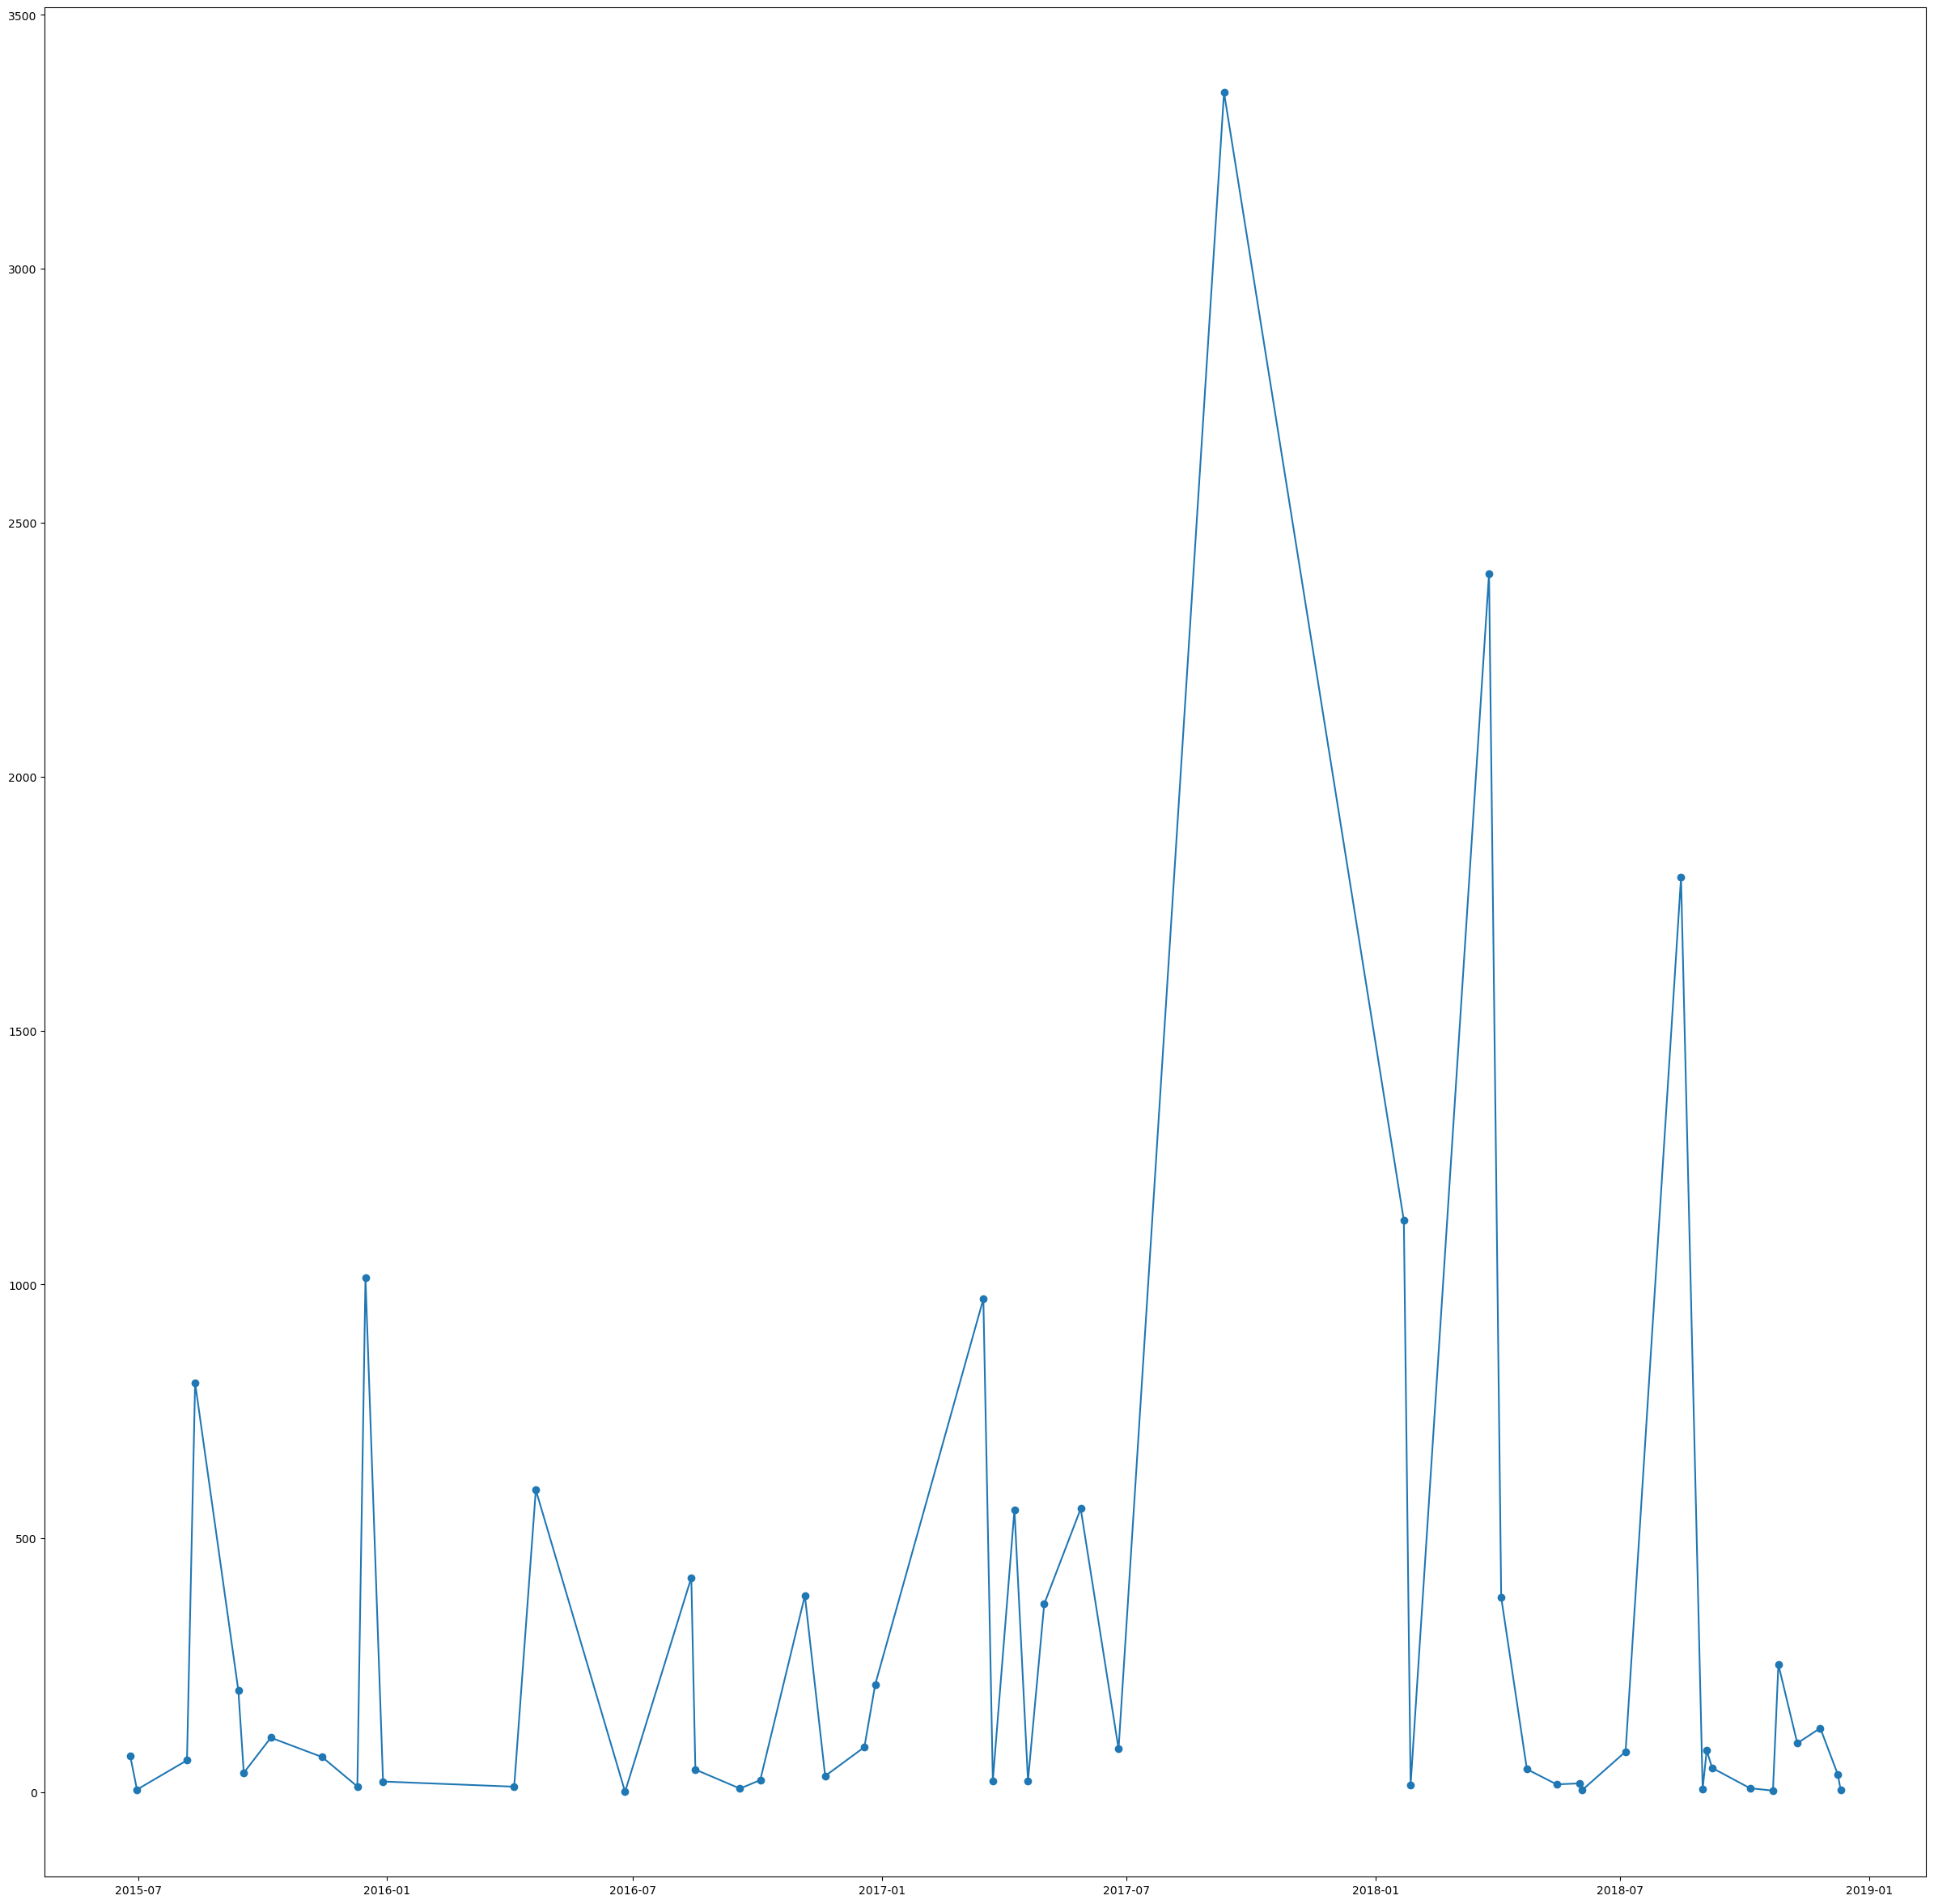

In [28]:
fig = plt.figure(figsize = (30,30))
plt.plot(random_50_sorted['Order Date'], random_50_sorted['Sales'], marker='o',linestyle='-')

## Is there a correlation between Sales and Postal code 

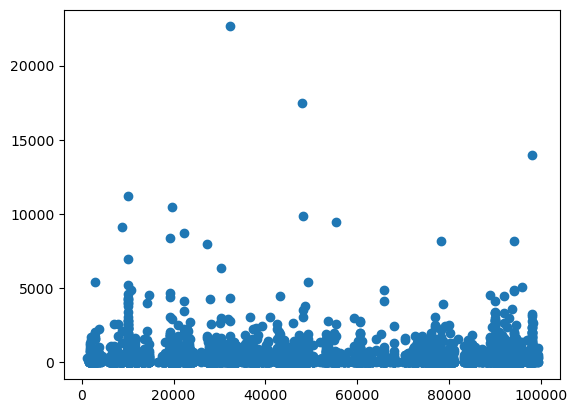

In [26]:
plt.scatter(df['Postal Code'], df['Sales'])

<Axes: >

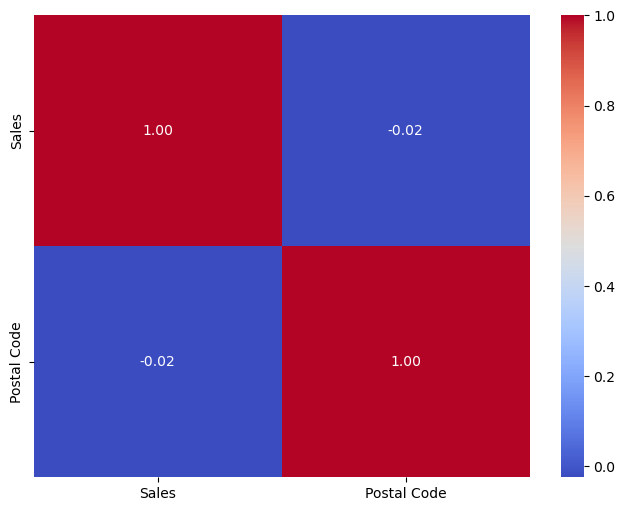

In [27]:
selected_columns = ['Sales', 'Postal Code']
selected_df = df[selected_columns]
correlation_matrix = selected_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

## No correlation between sales and postal code

## Which Customers contribute the most to the total sales?
(Bar Chart)

<BarContainer object of 10 artists>

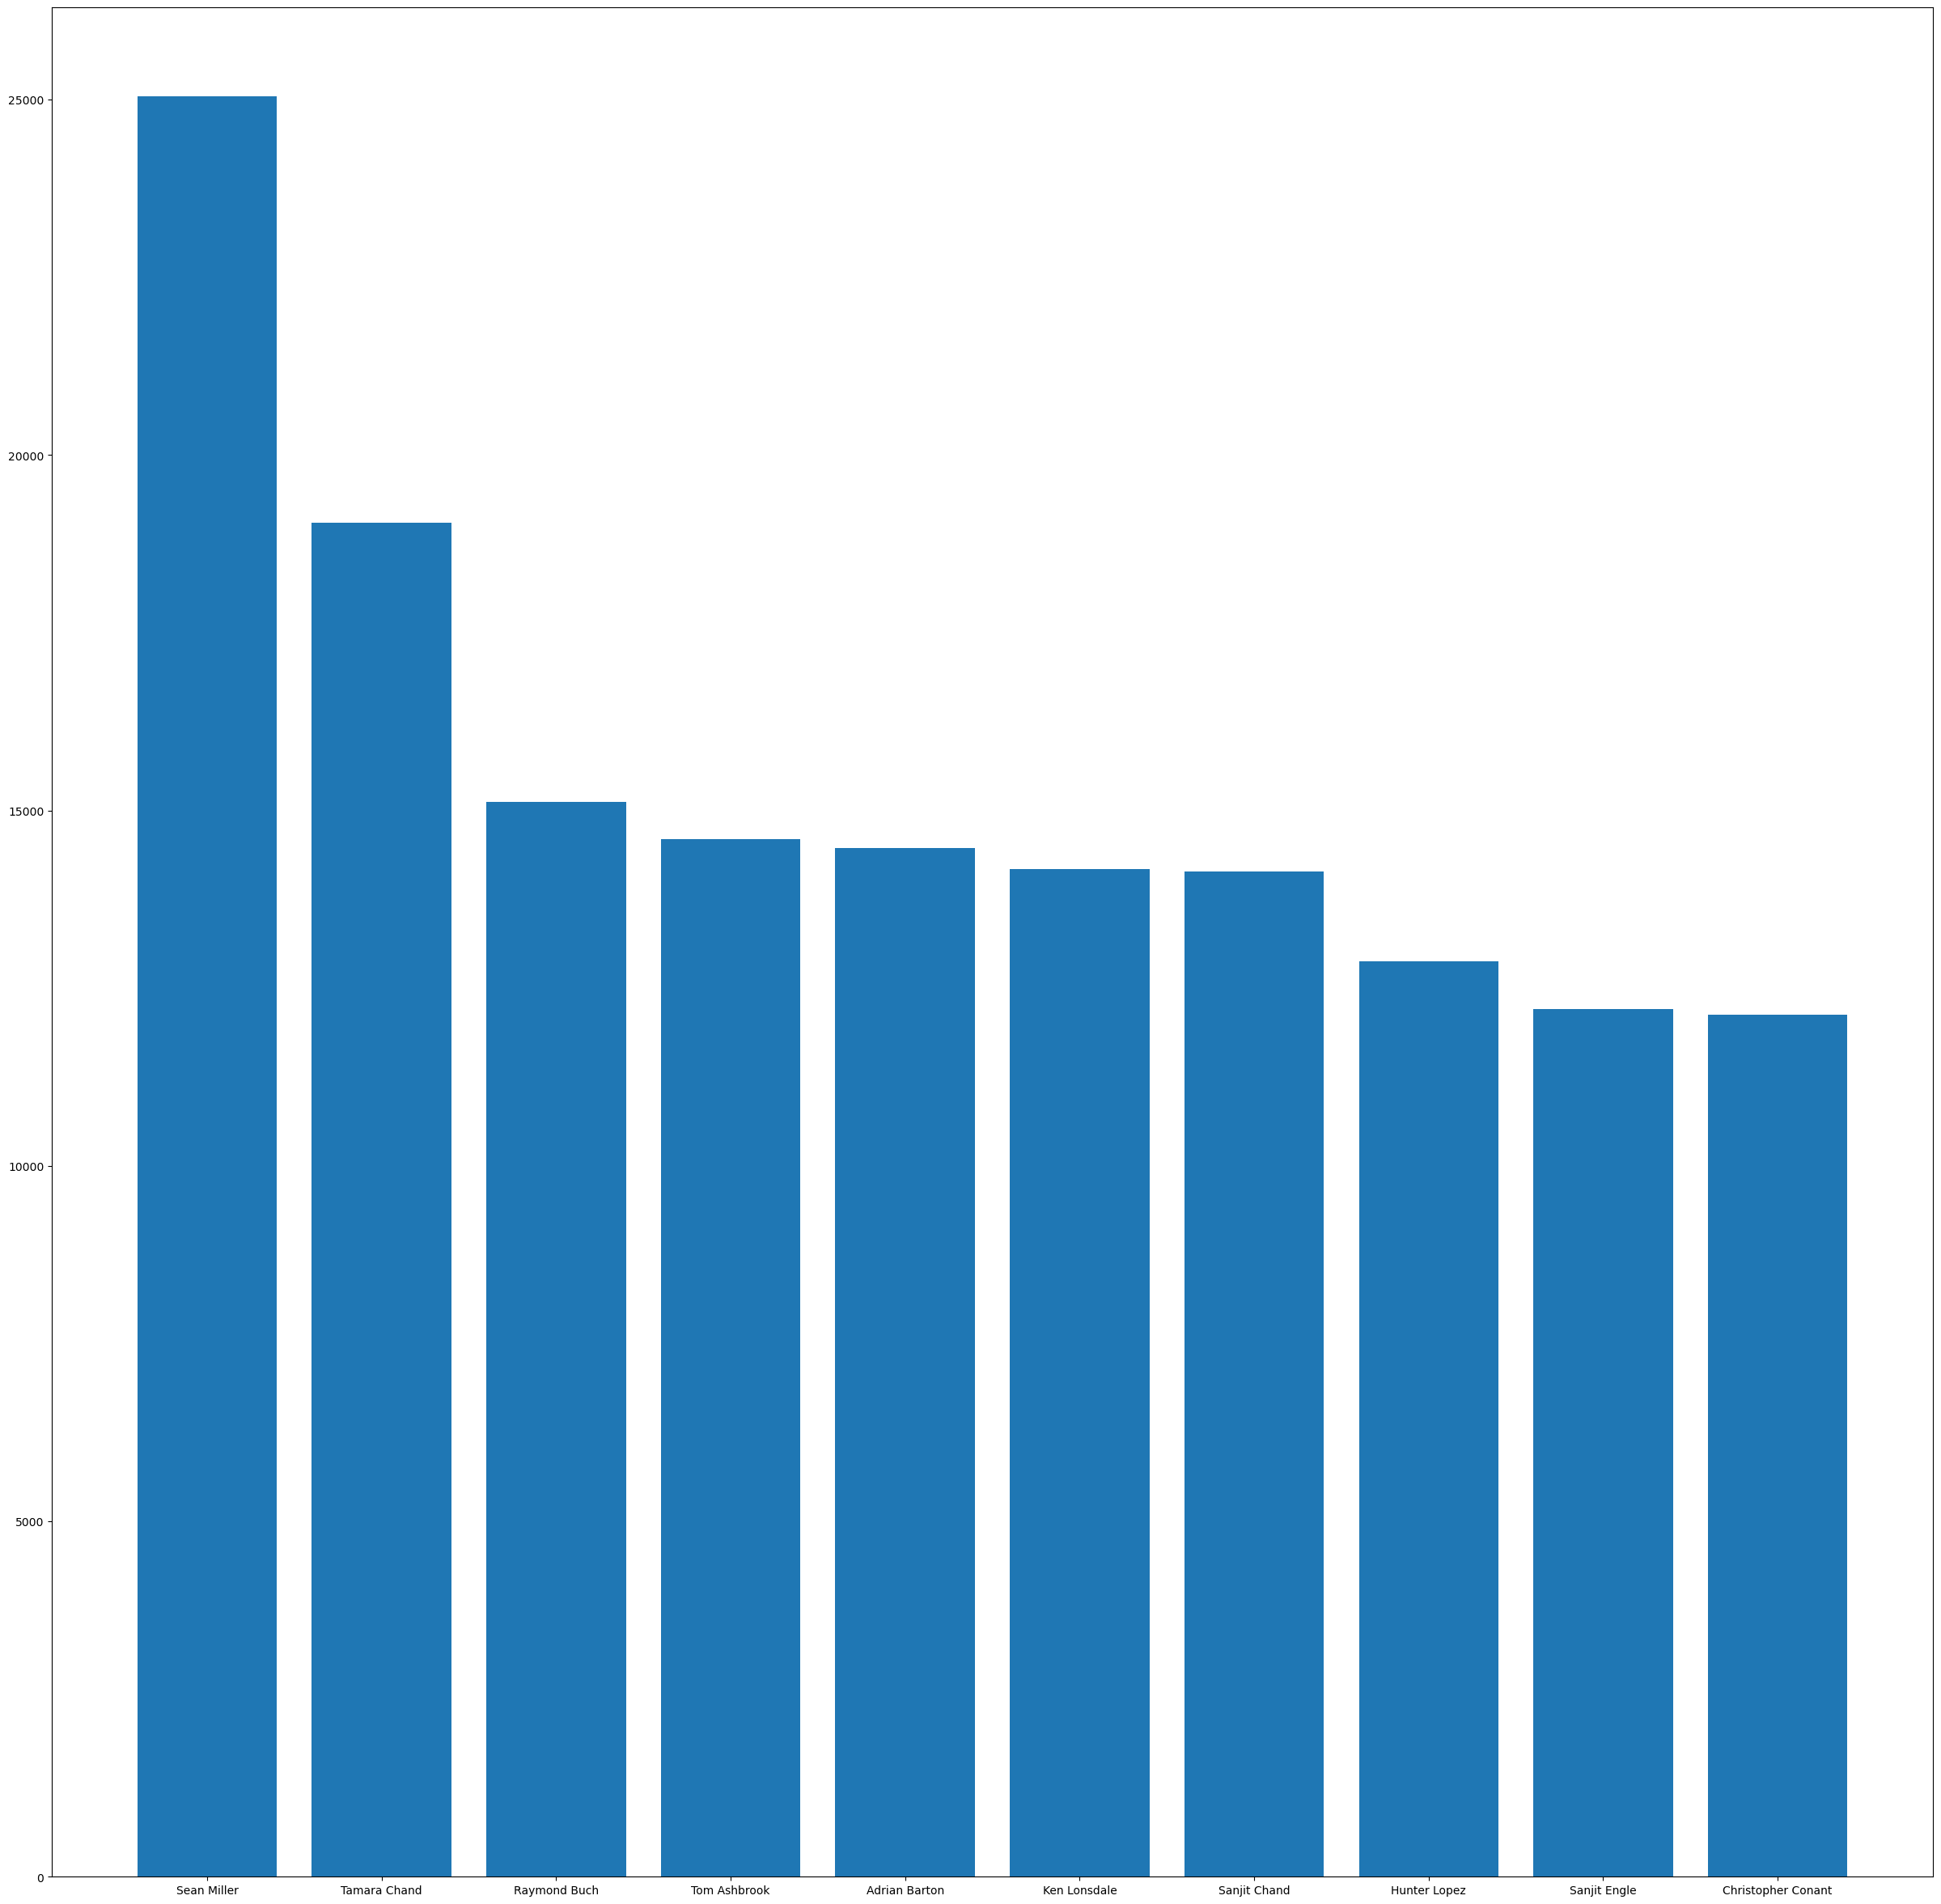

In [29]:
plt.figure(figsize=(30, 30))

total_sales_by_customer = df.groupby('Customer Name')['Sales'].sum()

total_sales_by_customer = total_sales_by_customer.sort_values(ascending=False)
top_customers = total_sales_by_customer.head(10)

plt.bar(top_customers.index, top_customers.values)

([<matplotlib.patches.Wedge at 0x7c1a2d2e0af0>,
 [Text(0.9592101101747381, 0.5384384500930136, 'Sean Miller'),
  Text(0.17377989642240774, 1.0861862398315574, 'Tamara Chand'),
  Text(-0.5648575985339992, 0.9438940053726391, 'Raymond Buch'),
  Text(-1.0023046684807617, 0.4531946066996722, 'Tom Ashbrook'),
  Text(-1.0843111118423385, -0.18511999550354313, 'Adrian Barton'),
  Text(-0.8016659212870033, -0.7532142793701275, 'Ken Lonsdale'),
  Text(-0.25950963393618076, -1.0689503028178202, 'Sanjit Chand'),
  Text(0.3393662202752761, -1.0463415162059053, 'Hunter Lopez'),
  Text(0.8087083170857571, -0.7456479449957082, 'Sanjit Engle'),
  Text(1.0664169842571747, -0.2697310061669455, 'Christopher Conant')],
 [Text(0.5232055146407663, 0.2936937000507347, '16.3%'),
  Text(0.0947890344122224, 0.592465221726304, '12.4%'),
  Text(-0.30810414465490865, 0.5148512756578031, '9.8%'),
  Text(-0.5467116373531427, 0.24719705819982118, '9.5%'),
  Text(-0.5914424246412755, -0.1009745430019326, '9.4%'),
  Te

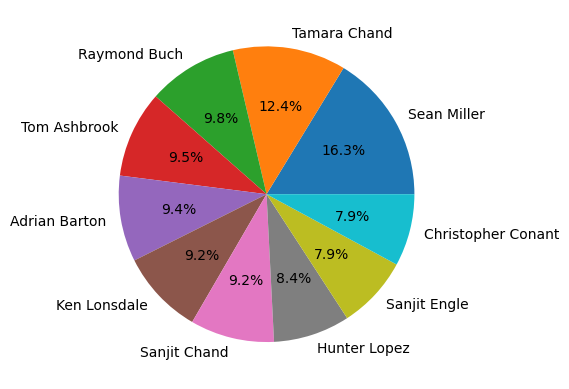

In [30]:
plt.pie(top_customers, labels=top_customers.index, autopct='%1.1f%%')


## Which countries, cities, states are the primary markets for the company's products?

In [31]:
primary_countries = df.groupby('Country').size().sort_values(ascending=False)
primary_cities = df.groupby('City').size().sort_values(ascending=False)
primary_states = df.groupby('State').size().sort_values(ascending=False)

In [32]:
primary_countries

Country
United States    9800
dtype: int64

In [33]:
primary_cities

City
New York City     891
Los Angeles       728
Philadelphia      532
San Francisco     500
Seattle           426
                 ... 
Keller              1
Jupiter             1
Jefferson City      1
Springdale          1
Aberdeen            1
Length: 529, dtype: int64

In [34]:
primary_states

State
California              1946
New York                1097
Texas                    973
Pennsylvania             582
Washington               504
Illinois                 483
Ohio                     454
Florida                  373
Michigan                 253
North Carolina           247
Virginia                 224
Arizona                  223
Tennessee                183
Colorado                 179
Georgia                  177
Kentucky                 137
Indiana                  135
Massachusetts            135
New Jersey               122
Oregon                   122
Maryland                 105
Wisconsin                105
Delaware                  93
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              55
Mississippi               53
Utah                      53
South Carolina            42
Louisiana                 41
Nevada  

<Axes: xlabel='City'>

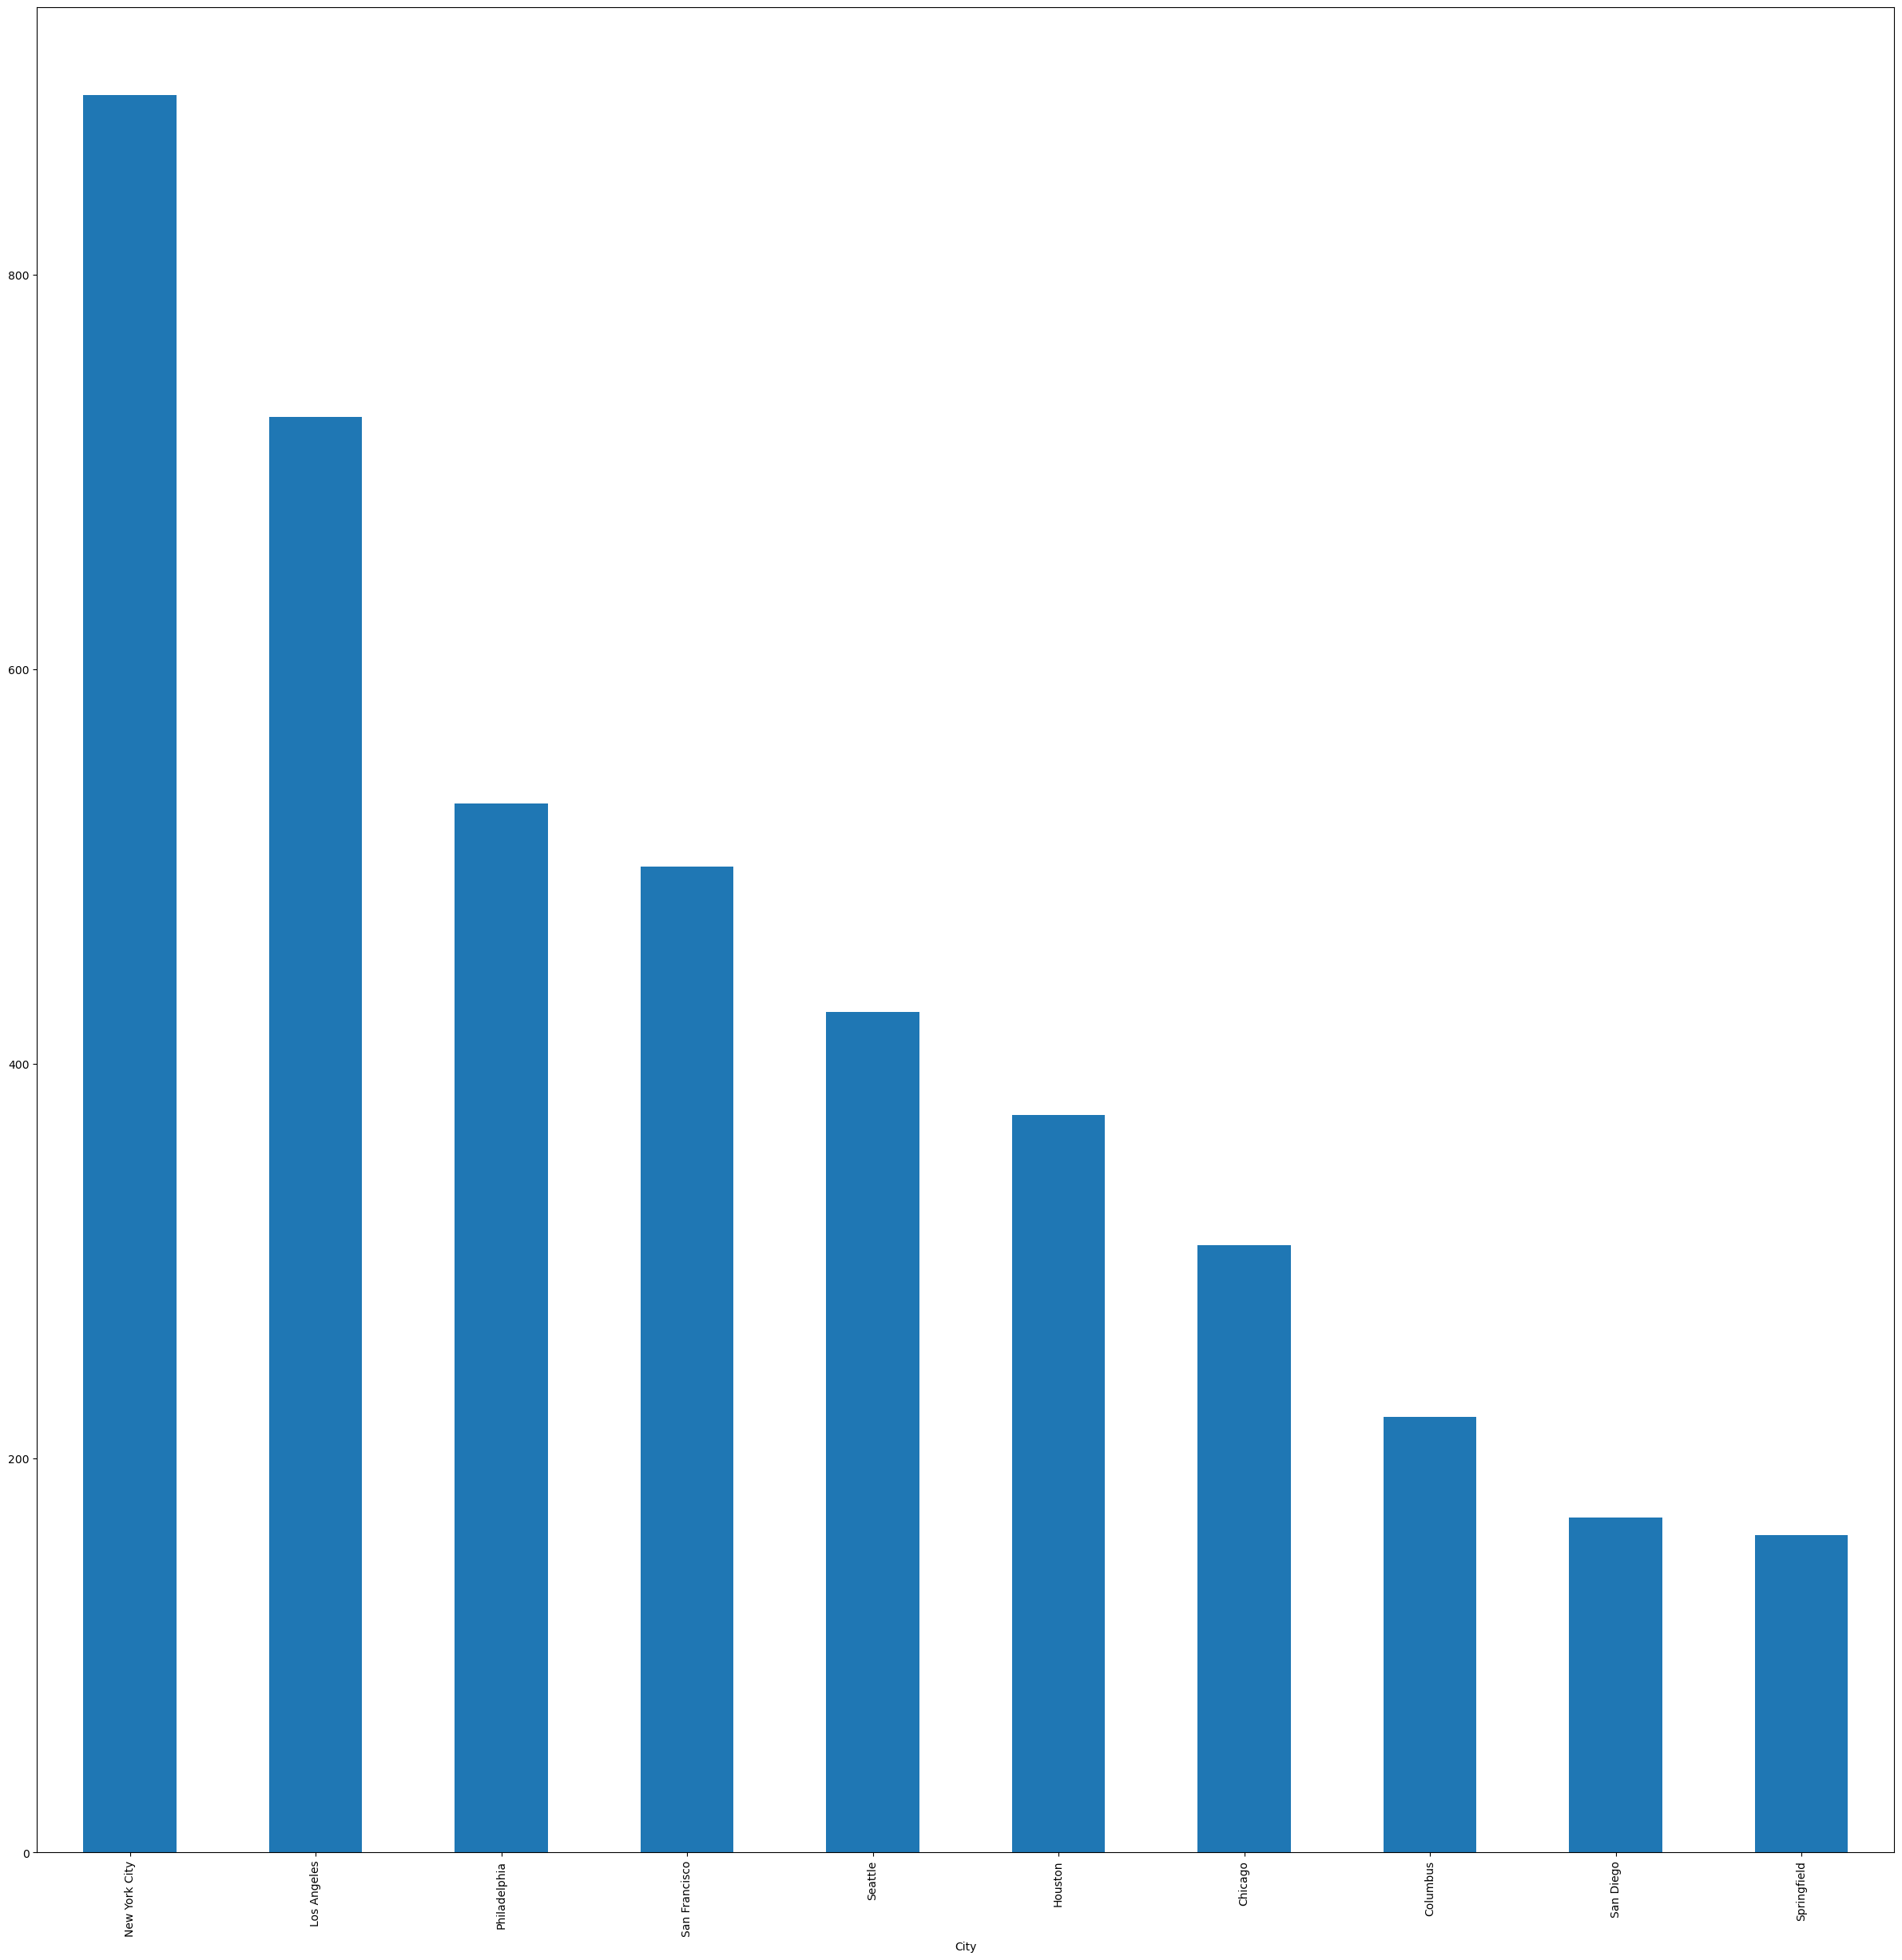

In [35]:
top_10 = primary_cities.head(10) 
plt.figure(figsize=(30,30))
top_10.plot(kind='bar')

<Axes: xlabel='State'>

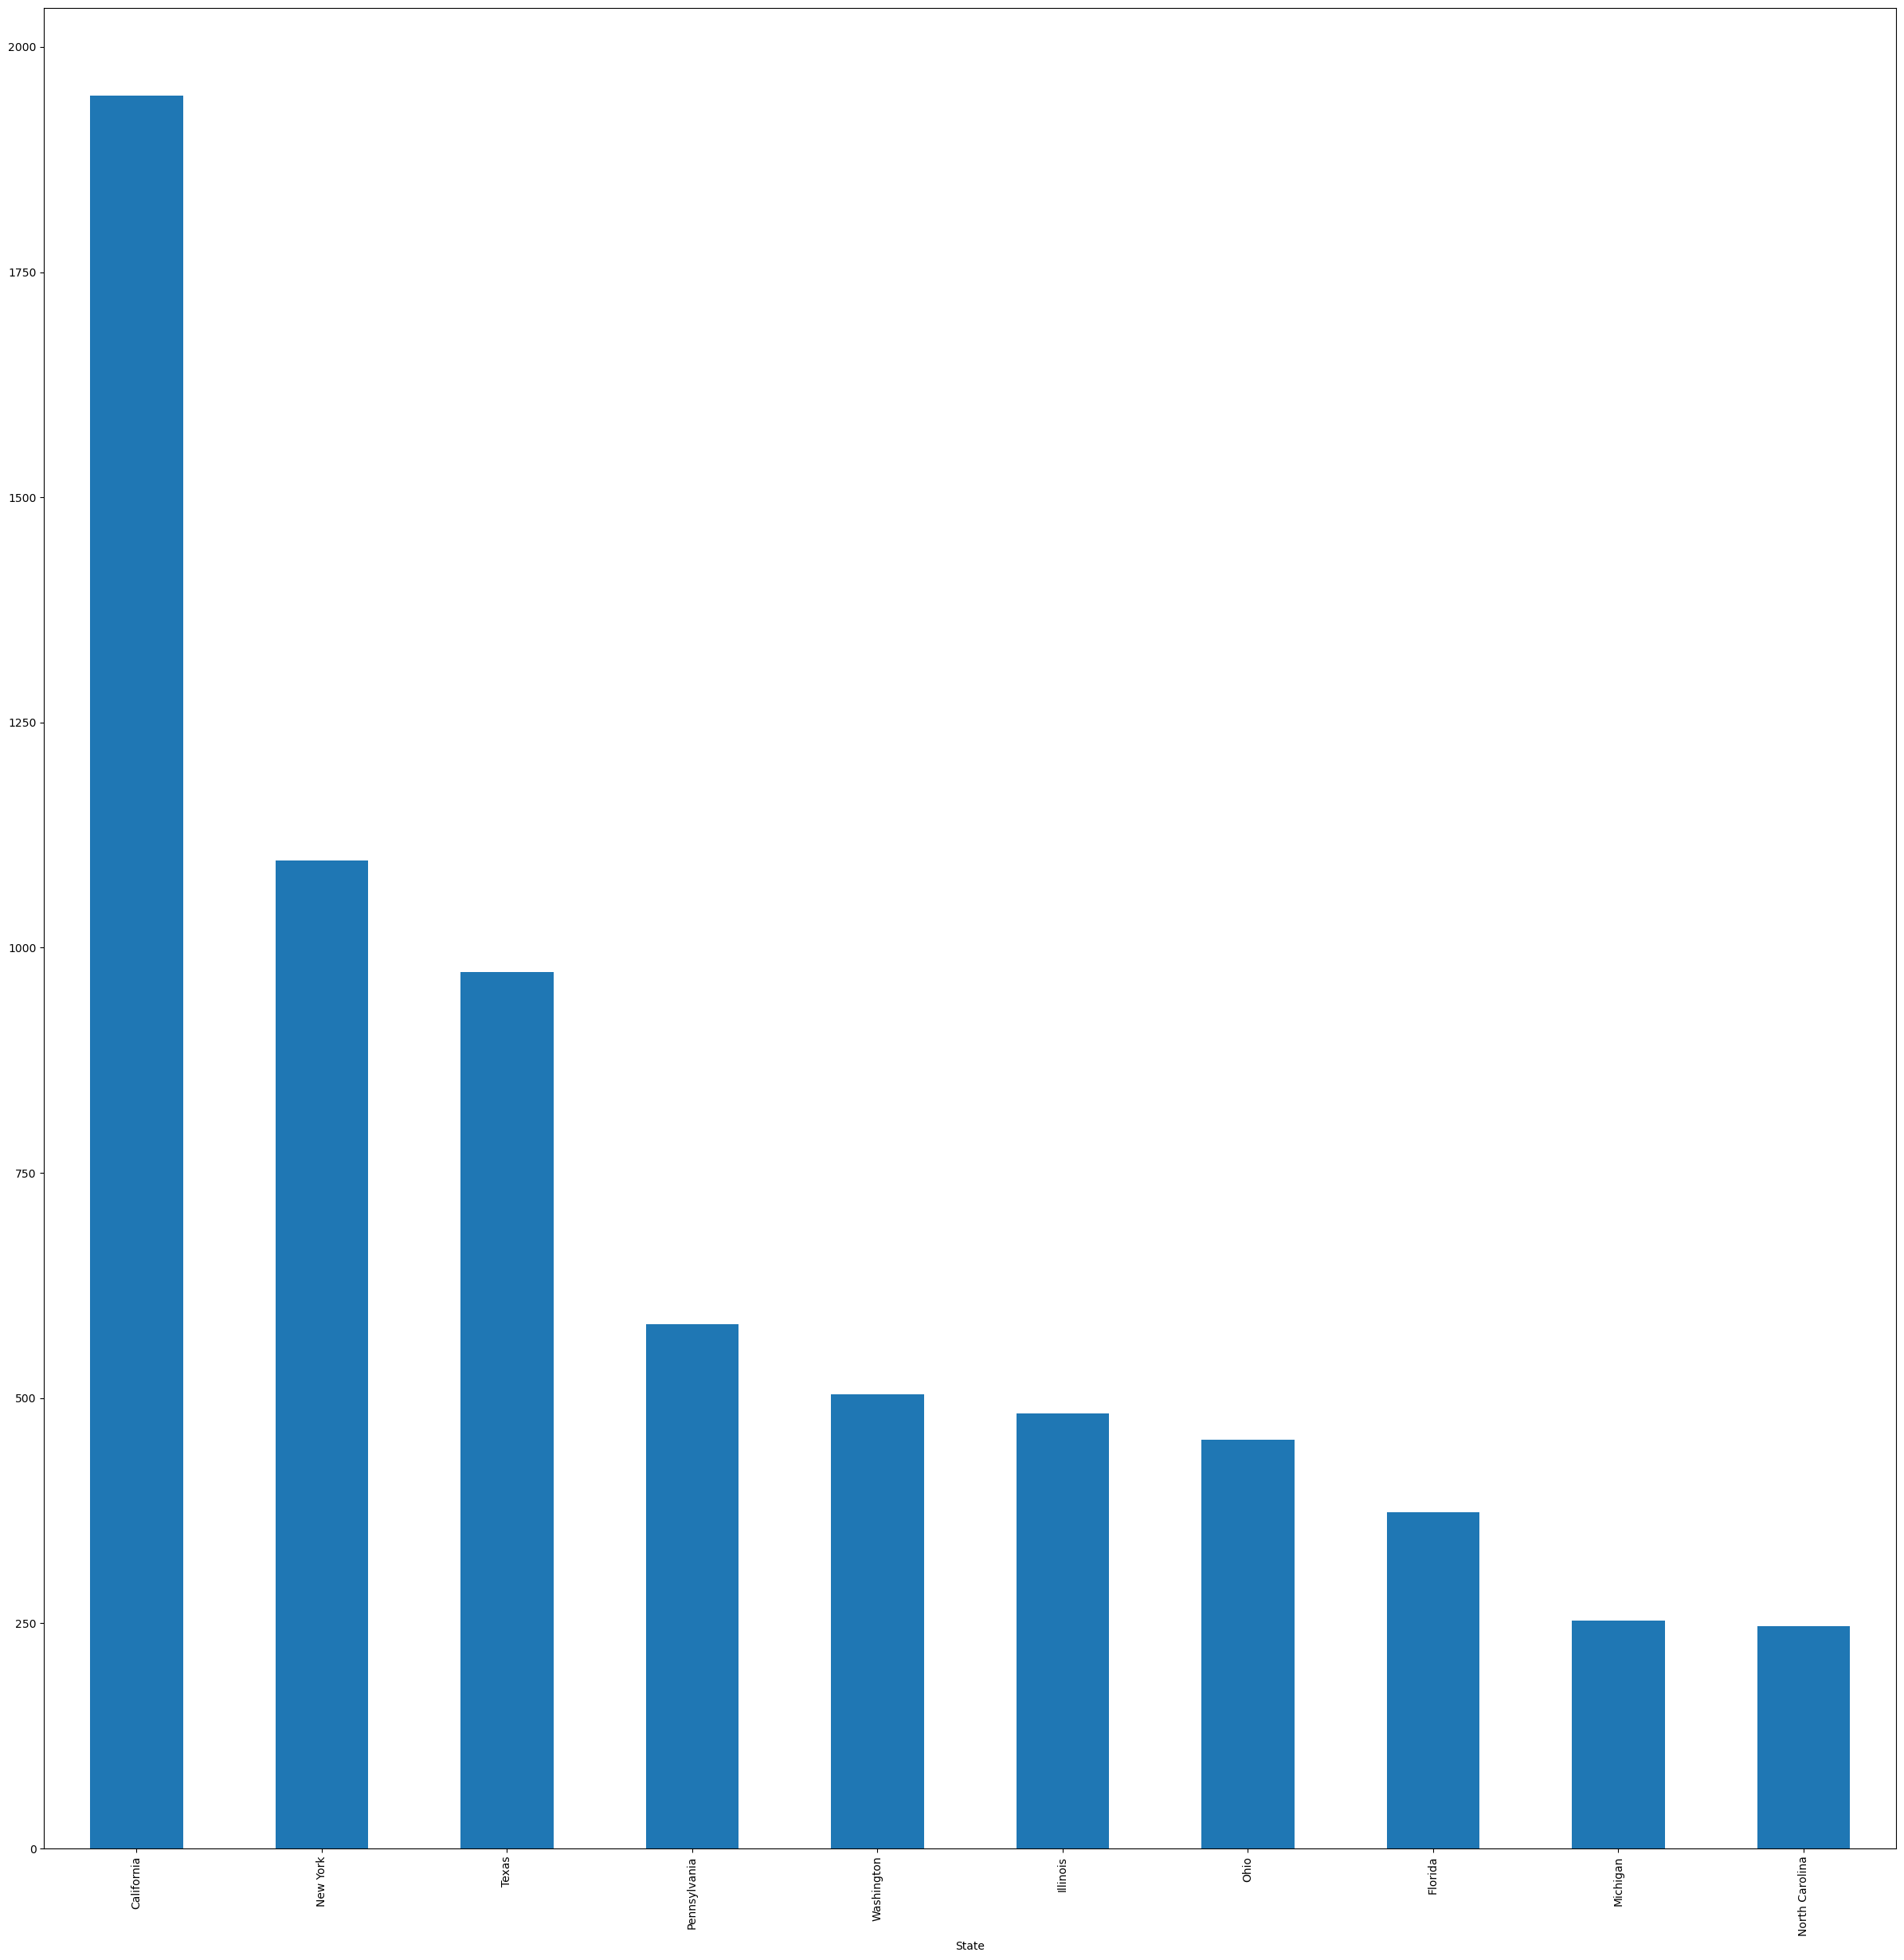

In [36]:
top_10_state = primary_states.head(10) 
plt.figure(figsize=(30,30))
top_10_state.plot(kind='bar')

## What is the relationship between average shipping delay for orders and their postal codes?

In [37]:
df2['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')
df2['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')

df2['Shipping Delay'] = (df2['Ship Date'] - df2['Order Date']).dt.days

average_delay_by_postal_code = df2.groupby('Postal Code')['Shipping Delay'].mean().reset_index()
average_delay_by_postal_code = average_delay_by_postal_code.sort_values(by='Shipping Delay', ascending=False)
average_delay_by_postal_code

,Postal Code,Shipping Delay
288,53186.0,7.0
381,72032.0,7.0
544,92399.0,7.0
371,68701.0,7.0
342,60543.0,7.0
...,...,...
132,29730.0,0.0
315,59102.0,0.0
272,48858.0,0.0
244,46368.0,0.0


Text(0, 0.5, 'Average Shipping Delay')

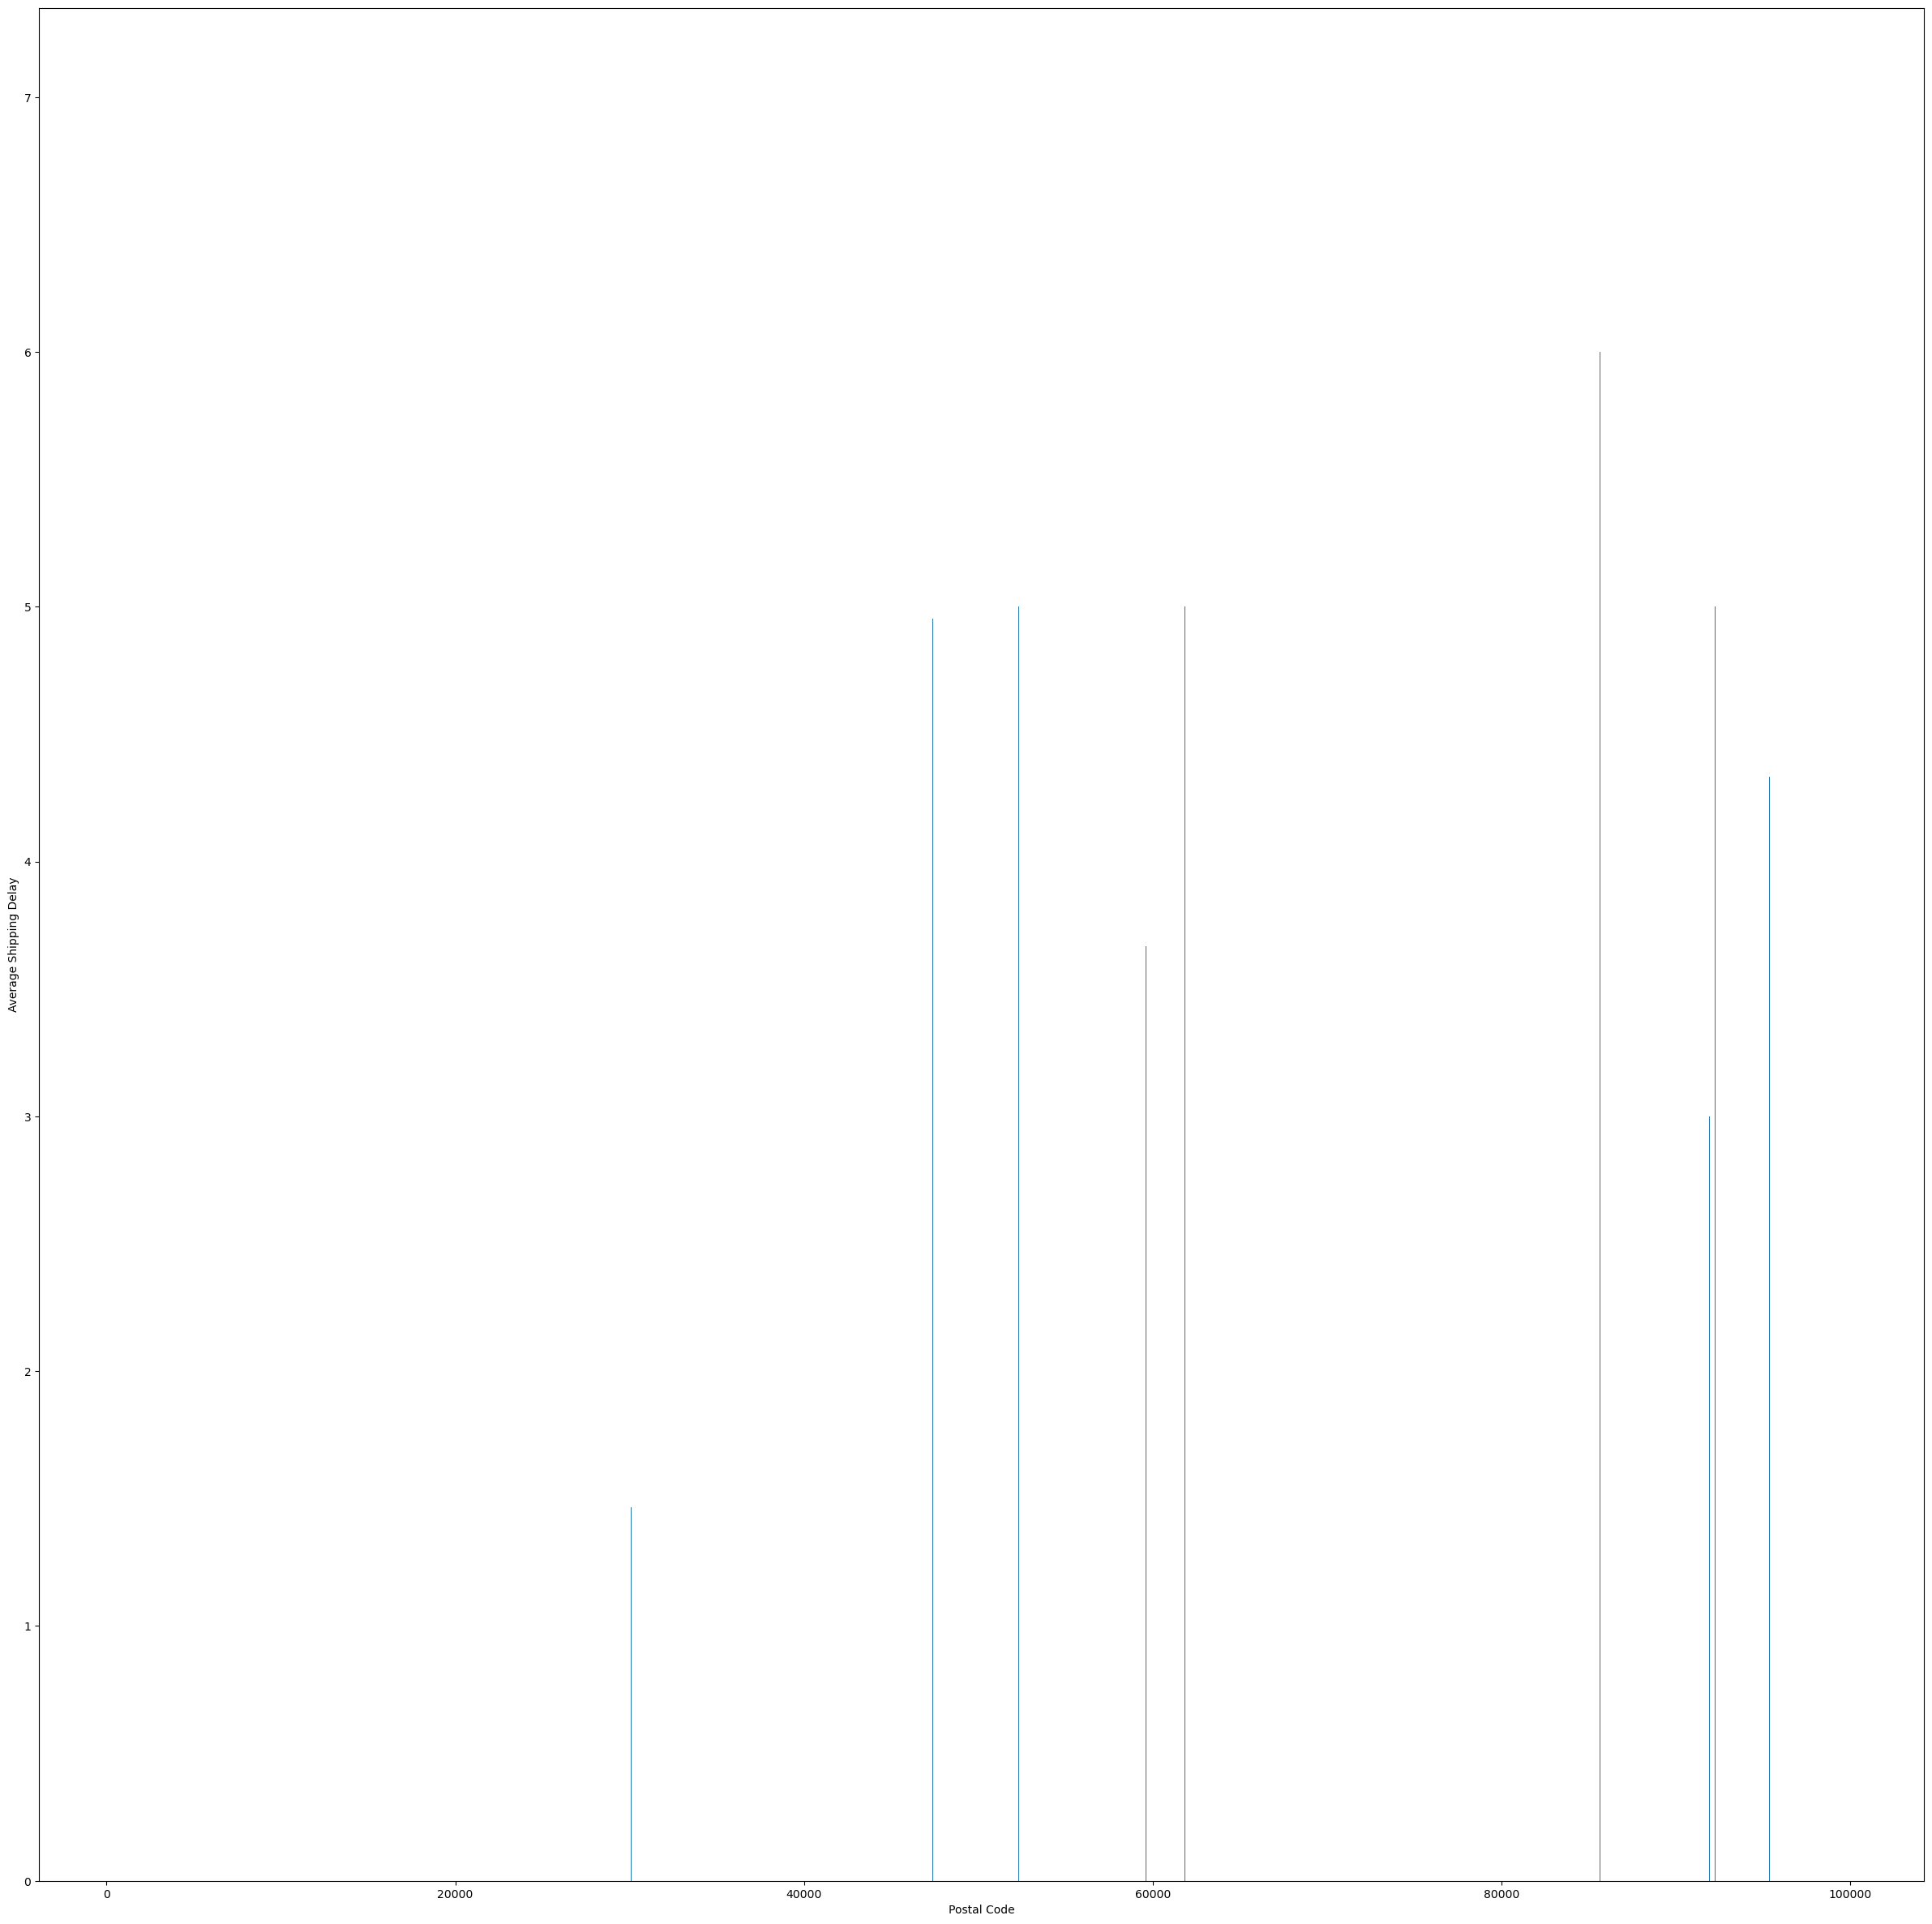

In [38]:
plt.figure(figsize=(30, 30))
# update bar width
plt.bar(average_delay_by_postal_code['Postal Code'], average_delay_by_postal_code['Shipping Delay'])
plt.xlabel('Postal Code')
plt.ylabel('Average Shipping Delay')

## What is the distribution of sales across different product categories?

<Axes: xlabel='Sales', ylabel='Density'>

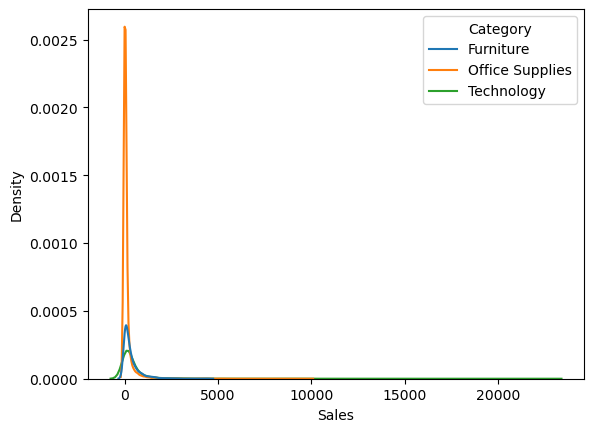

In [39]:
sns.kdeplot(data=df, x="Sales", hue="Category")

## What are the top-selling product Category in each state?

In [40]:
top_Selling_products=df.groupby(['State','Category']).sum().sort_values("Sales" , ascending= False)[["Sales"]]
top_Selling_products

/tmp/ipykernel_32/657965669.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_Selling_products=df.groupby(['State','Category']).sum().sort_values("Sales" , ascending= False)[["Sales"]]


Sales
State                Category                    
California           Technology       154684.1800
                     Furniture        152216.5355
                     Office Supplies  139405.7480
New York             Technology       126902.6900
                     Furniture         92504.5650
...                                           ...
South Dakota         Furniture           324.9000
District of Columbia Office Supplies     138.5200
Kansas               Furniture           111.1200
Maine                Furniture           109.4800
Montana              Furniture            63.9800

[142 rows x 1 columns]

In [41]:
highest_category_indices = top_Selling_products.groupby('State')['Sales'].idxmax()
highest_category_indices

State
Alabama                              (Alabama, Technology)
Arizona                               (Arizona, Furniture)
Arkansas                       (Arkansas, Office Supplies)
California                        (California, Technology)
Colorado                             (Colorado, Furniture)
Connecticut                 (Connecticut, Office Supplies)
Delaware                            (Delaware, Technology)
District of Columbia    (District of Columbia, Technology)
Florida                              (Florida, Technology)
Georgia                         (Georgia, Office Supplies)
Idaho                                   (Idaho, Furniture)
Illinois                            (Illinois, Technology)
Indiana                              (Indiana, Technology)
Iowa                                     (Iowa, Furniture)
Kansas                           (Kansas, Office Supplies)
Kentucky                            (Kentucky, Technology)
Louisiana                     (Louisiana, Office S

In [42]:
top_Selling_products = top_Selling_products.loc[highest_category_indices].sort_values("Sales" , ascending= False)
top_Selling_products

,,Sales
State,Category,
California,Technology,154684.180
New York,Technology,126902.690
Texas,Technology,64656.272
Washington,Technology,50536.710
Florida,Technology,46968.036
Pennsylvania,Technology,42064.069
Michigan,Office Supplies,37688.199
Ohio,Technology,34550.548
Illinois,Technology,31637.881


<Axes: xlabel='State,Category'>

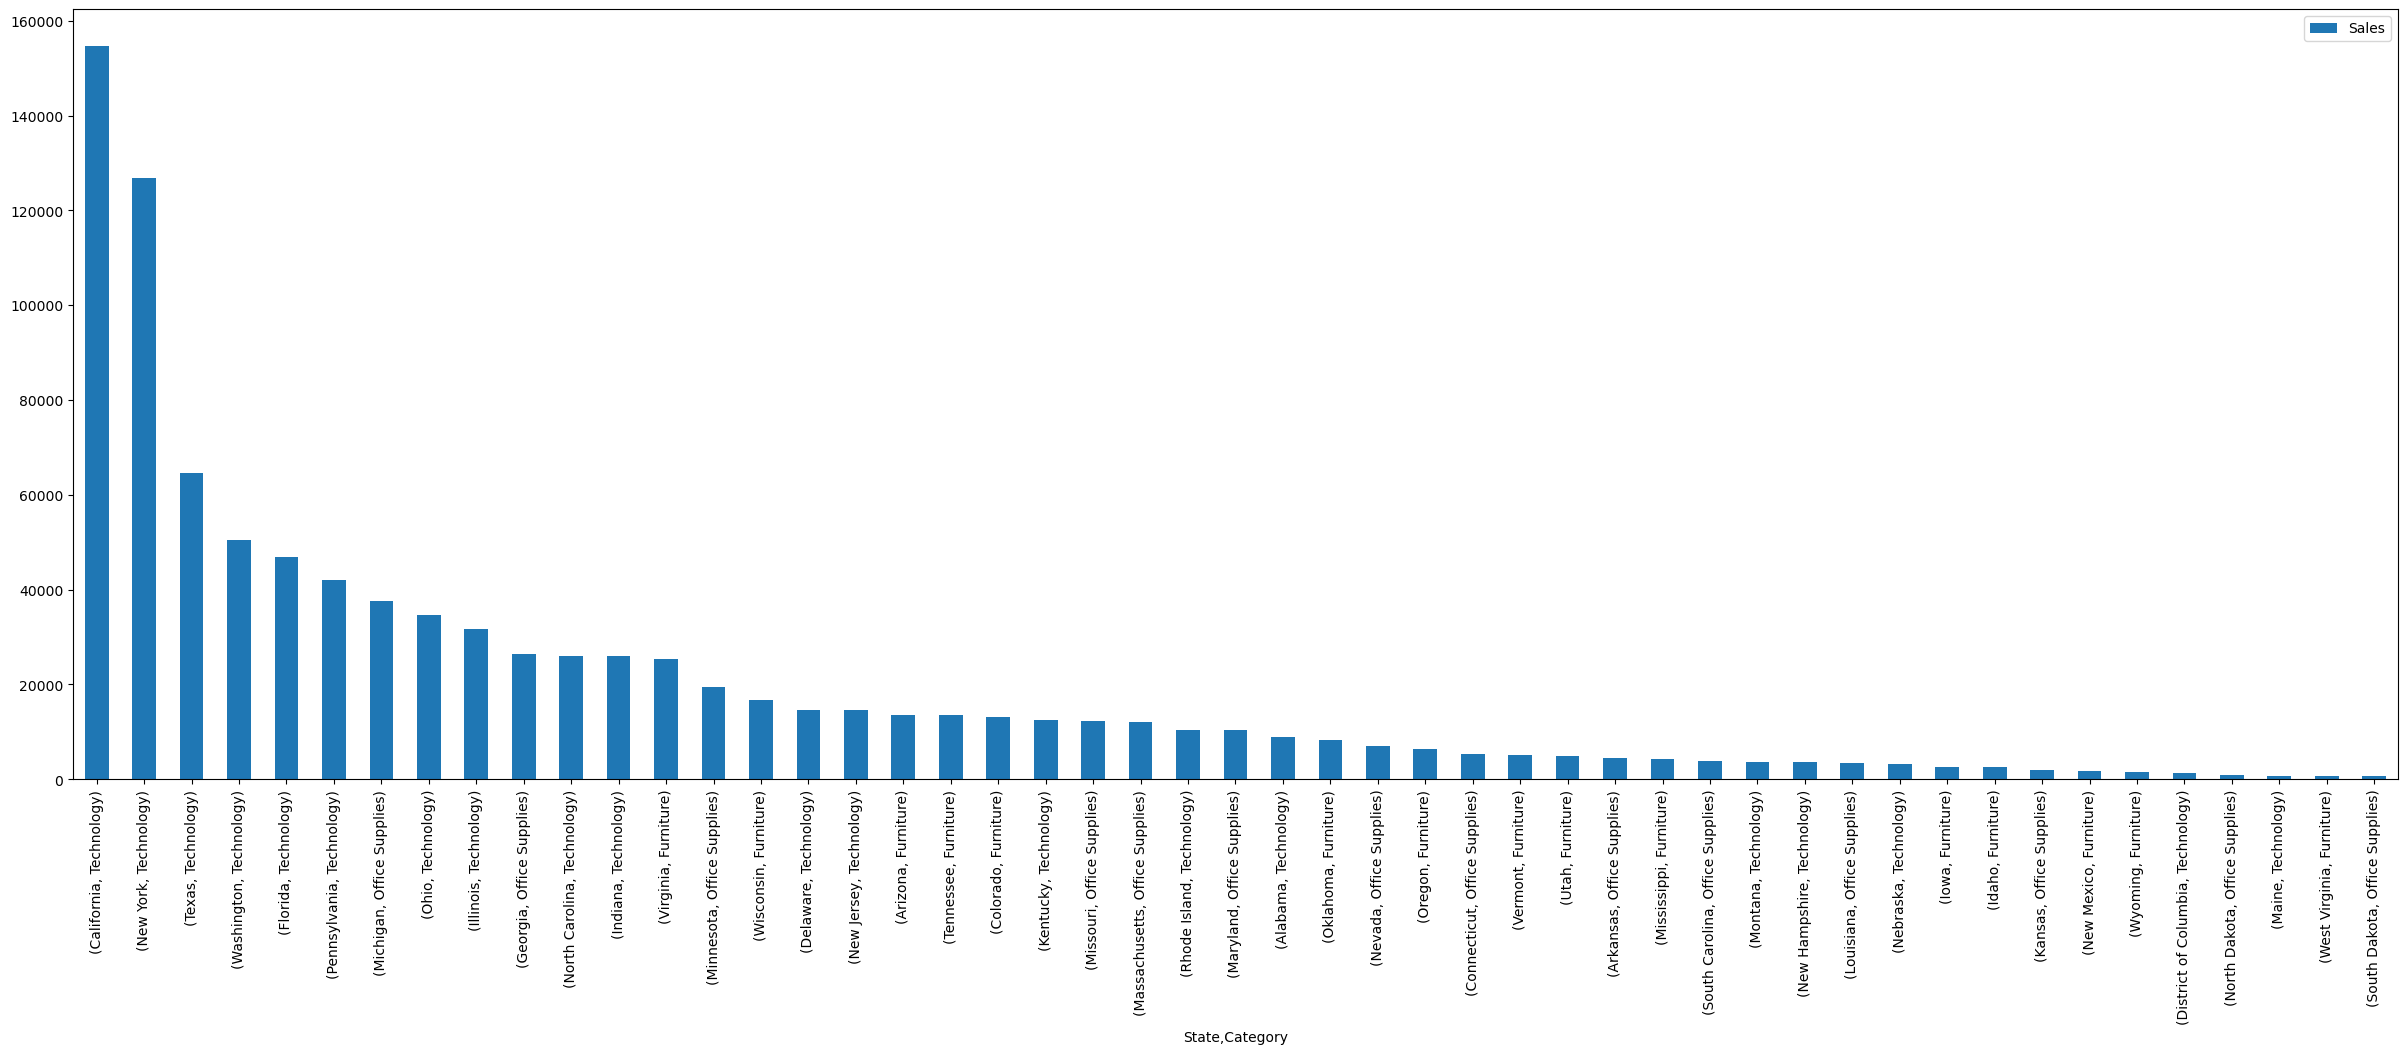

In [43]:
top_Selling_products.plot(kind='bar', figsize=(30, 10))

## Which Segments contribute the most to the total sales?
(Bar Chart)

([<matplotlib.patches.Wedge at 0x7c1a26857f70>,
 [Text(-0.02642083976554102, 1.0996826538715994, 'Consumer'),
  Text(-0.5902005886829921, -0.9282581888236967, 'Corporate'),
  Text(0.913814451312435, -0.612326014940206, 'Home Office')],
 [Text(-0.014411367144840556, 0.5998269021117814, '50.8%'),
  Text(-0.3219275938270865, -0.5063226484492891, '30.4%'),
  Text(0.49844424617041905, -0.33399600814920327, '18.8%')])

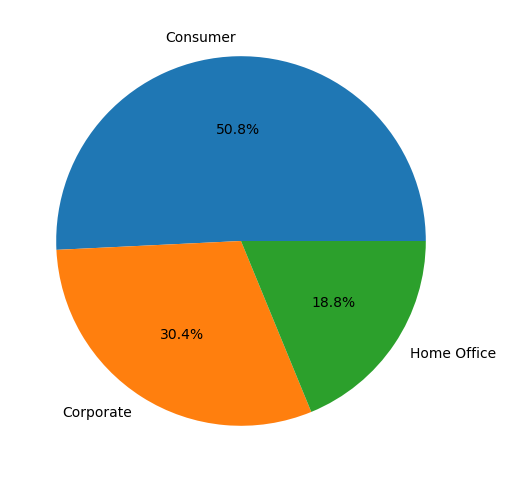

In [44]:
segment_sales = df.groupby('Segment')['Sales'].sum()
plt.figure(figsize=(12, 6))
plt.pie(segment_sales, labels=segment_sales.index, autopct='%1.1f%%')

## Are there any outliers in Sales?

<Axes: xlabel='Sales'>

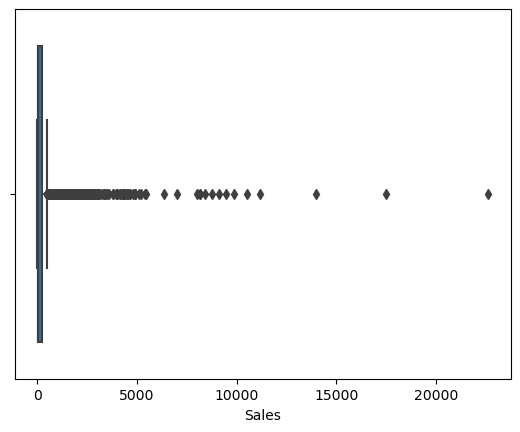

In [45]:
sns.boxplot(x=df['Sales'])

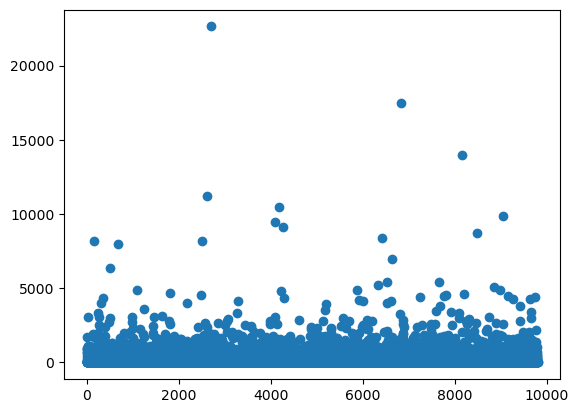

In [46]:
plt.scatter(range(len(df)), df['Sales'])

## What are the most popular shipping modes used?

In [48]:
df['Ship Mode'].value_counts()

Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: Ship Mode, dtype: int64

## Which states have the highest number of customers

In [47]:
highestNo_cust= df.groupby('State')['Customer ID'].nunique()
highestNo_cust

State
Alabama                  34
Arizona                  99
Arkansas                 27
California              570
Colorado                 74
Connecticut              43
Delaware                 43
District of Columbia      4
Florida                 178
Georgia                  80
Idaho                    11
Illinois                231
Indiana                  67
Iowa                     16
Kansas                   14
Kentucky                 56
Louisiana                20
Maine                     3
Maryland                 45
Massachusetts            62
Michigan                105
Minnesota                42
Mississippi              25
Missouri                 28
Montana                   8
Nebraska                 23
Nevada                   23
New Hampshire            17
New Jersey               58
New Mexico               22
New York                409
North Carolina          120
North Dakota              2
Ohio                    196
Oklahoma                 34
Oregon        

In [49]:
highestNo_cust = highestNo_cust.sort_values(ascending=False)
highestNo_cust

State
California              570
New York                409
Texas                   367
Pennsylvania            255
Illinois                231
Washington              223
Ohio                    196
Florida                 178
North Carolina          120
Virginia                107
Michigan                105
Arizona                  99
Tennessee                84
Georgia                  80
Colorado                 74
Indiana                  67
Massachusetts            62
New Jersey               58
Kentucky                 56
Wisconsin                51
Oregon                   50
Maryland                 45
Connecticut              43
Delaware                 43
Minnesota                42
Alabama                  34
Oklahoma                 34
Missouri                 28
Arkansas                 27
Utah                     26
Mississippi              25
Rhode Island             24
Nevada                   23
Nebraska                 23
New Mexico               22
Louisiana     

<Axes: xlabel='State'>

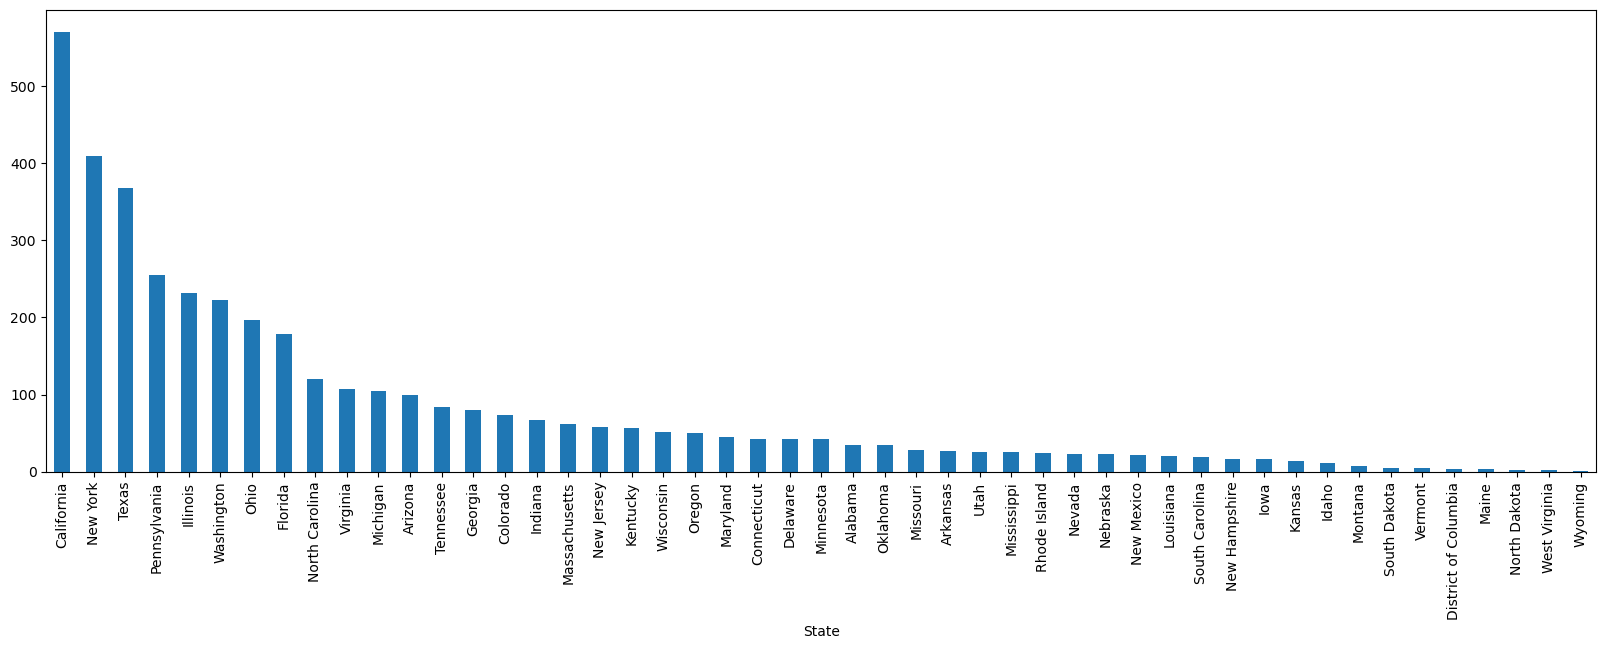

In [50]:
highestNo_cust.plot(kind='bar', figsize = (20,6))

## What is the average time it takes to ship an order for each state

In [51]:
df2['Shipping Delay']

0       3
1       3
2       4
3       7
4       7
       ..
9795    7
9796    5
9797    5
9798    5
9799    5
Name: Shipping Delay, Length: 9800, dtype: int64

In [52]:
average_shipping_time_per_state = df2.groupby('State')['Shipping Delay'].mean()
average_shipping_time_per_state

State
Alabama                 4.114754
Arizona                 4.067265
Arkansas                4.133333
California              3.866906
Colorado                3.675978
Connecticut             3.597561
Delaware                4.247312
District of Columbia    5.700000
Florida                 3.946381
Georgia                 3.858757
Idaho                   3.666667
Illinois                4.142857
Indiana                 4.325926
Iowa                    4.730769
Kansas                  3.958333
Kentucky                3.868613
Louisiana               3.048780
Maine                   5.000000
Maryland                4.019048
Massachusetts           3.881481
Michigan                4.083004
Minnesota               4.483146
Mississippi             4.207547
Missouri                4.075758
Montana                 4.600000
Nebraska                3.500000
Nevada                  4.384615
New Hampshire           3.703704
New Jersey              4.459016
New Mexico              4.513514
New 

In [53]:
average_shipping_time_per_state = average_shipping_time_per_state.sort_values(ascending=False)
average_shipping_time_per_state

State
District of Columbia    5.700000
Wyoming                 5.000000
Maine                   5.000000
Iowa                    4.730769
Montana                 4.600000
New Mexico              4.513514
Oklahoma                4.484848
Minnesota               4.483146
New Jersey              4.459016
South Dakota            4.416667
Nevada                  4.384615
Tennessee               4.382514
Utah                    4.358491
Oregon                  4.336066
Indiana                 4.325926
Delaware                4.247312
Mississippi             4.207547
Illinois                4.142857
Arkansas                4.133333
Alabama                 4.114754
Michigan                4.083004
Missouri                4.075758
Arizona                 4.067265
New York                4.051960
Wisconsin               4.038095
Maryland                4.019048
North Carolina          3.983806
Washington              3.972222
Kansas                  3.958333
Florida                 3.946381
Texa

<Axes: xlabel='State'>

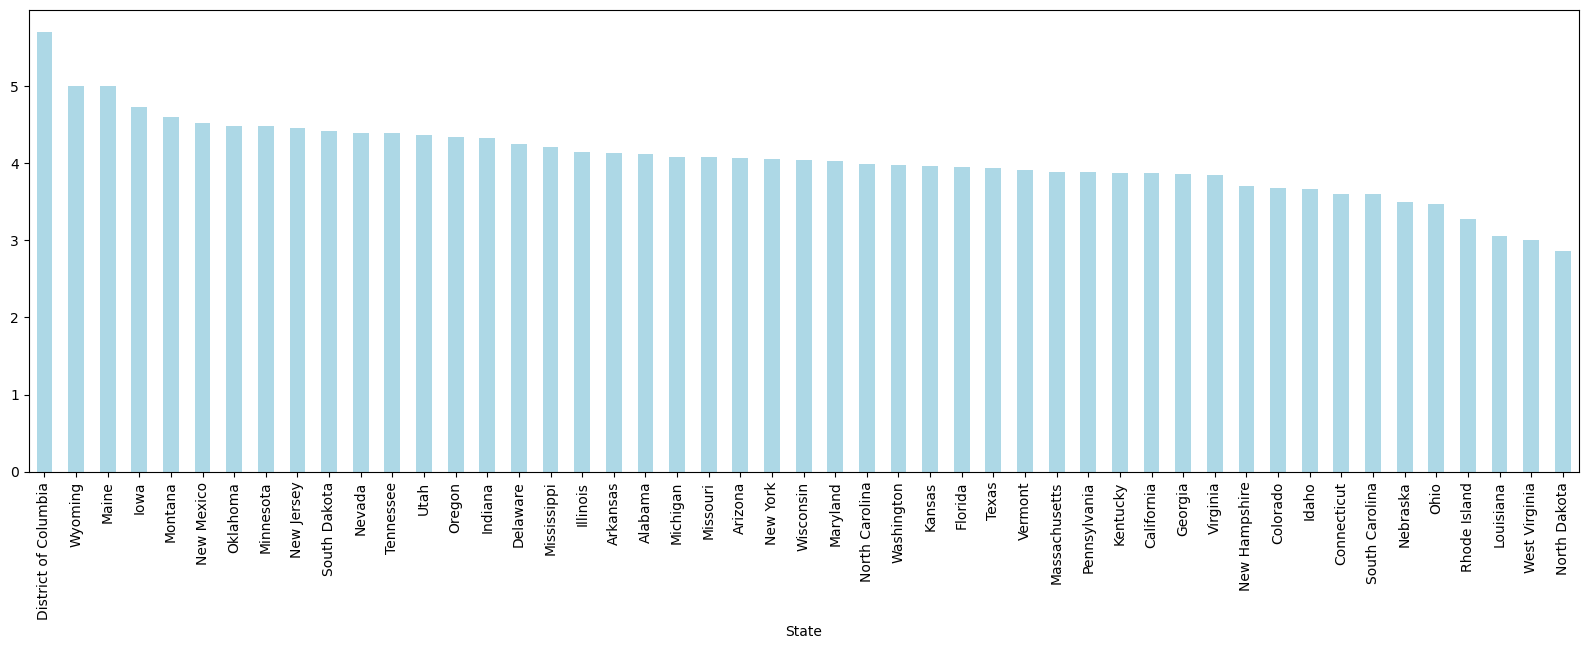

In [54]:
average_shipping_time_per_state.plot(kind='bar', color='lightblue', figsize= (20,6))

# Removing Duplicates

In [55]:
df.duplicated().sum()
# no duplicated rows to remove

0

# Encoding Categorical Variables

In [56]:
df2['Ship Mode'].replace("Standard Class" , 0 , inplace = True)
df2['Ship Mode'].replace("Second Class" , 1 , inplace = True)
df2['Ship Mode'].replace("First Class" , 2 , inplace = True)
df2['Ship Mode'].replace("Same Day" , 3 , inplace = True)
df2.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Shipping Delay
0,1,CA-2017-152156,2017-11-08,2017-11-11,1,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,3
1,2,CA-2017-152156,2017-11-08,2017-11-11,1,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3
2,3,CA-2017-138688,2017-06-12,2017-06-16,1,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,4
3,4,US-2016-108966,2016-10-11,2016-10-18,0,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,7
4,5,US-2016-108966,2016-10-11,2016-10-18,0,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,7


In [57]:
df2['Segment'].value_counts()

Consumer       5101
Corporate      2953
Home Office    1746
Name: Segment, dtype: int64

In [58]:
df2['Segment'].replace("Consumer" , 0 , inplace = True)
df2['Segment'].replace("Corporate" , 1 , inplace = True)
df2['Segment'].replace("Home Office" , 2 , inplace = True)
df2.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Shipping Delay
0,1,CA-2017-152156,2017-11-08,2017-11-11,1,CG-12520,Claire Gute,0,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,3
1,2,CA-2017-152156,2017-11-08,2017-11-11,1,CG-12520,Claire Gute,0,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3
2,3,CA-2017-138688,2017-06-12,2017-06-16,1,DV-13045,Darrin Van Huff,1,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,4
3,4,US-2016-108966,2016-10-11,2016-10-18,0,SO-20335,Sean O'Donnell,0,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,7
4,5,US-2016-108966,2016-10-11,2016-10-18,0,SO-20335,Sean O'Donnell,0,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,7


In [59]:
df2['Category'].value_counts()

Office Supplies    5909
Furniture          2078
Technology         1813
Name: Category, dtype: int64

In [60]:
df.columns.to_list()

['Row ID',
 'Order ID',
 'Order Date',
 'Ship Date',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'Country',
 'City',
 'State',
 'Postal Code',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'Sales']

In [61]:
df2['Category'].replace("Office Supplies" , 0 , inplace = True)
df2['Category'].replace("Furniture" , 1 , inplace = True)
df2['Category'].replace("Technology" , 2 , inplace = True)
df2.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Shipping Delay
0,1,CA-2017-152156,2017-11-08,2017-11-11,1,CG-12520,Claire Gute,0,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,1,Bookcases,Bush Somerset Collection Bookcase,261.9600,3
1,2,CA-2017-152156,2017-11-08,2017-11-11,1,CG-12520,Claire Gute,0,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,1,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3
2,3,CA-2017-138688,2017-06-12,2017-06-16,1,DV-13045,Darrin Van Huff,1,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,0,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,4
3,4,US-2016-108966,2016-10-11,2016-10-18,0,SO-20335,Sean O'Donnell,0,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,1,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,7
4,5,US-2016-108966,2016-10-11,2016-10-18,0,SO-20335,Sean O'Donnell,0,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,0,Storage,Eldon Fold 'N Roll Cart System,22.3680,7
